In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
import astropy.constants as c
import scipy.signal as sig
import scipy.special as spec

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
def pulsarPeanut(type):
    
    '''
    calculate pulsar peanut pattern or integrand of HD curve for two pulsars separated by 0 or 180 degrees 
    for Earth-term only or full response
    '''

    # type = 'earth', 'full', 'earth0', 'earth180', 'full0', 'full180'

    # polar angle
    J = 5000         
    theta = np.linspace(0, np.pi, J)
    
    # express f as a multiple of free spectral range (fsr= c/L)
    N = 1 # at fsr
    N = 20 # f = 20*fsr

    mag = np.zeros(J)
    for j in range(J):

        if type=='earth':

            mag[j] = (1/2)*np.abs(1+np.cos(theta[j]))
            figtitle = 'pulsarPeanutEarth.pdf'
            
        if type=='earth0':

            mag[j] = ( (1/2)*np.abs(1+np.cos(theta[j])) )**2
            figtitle = 'pulsarOverlapEarth0.pdf'
            
        if type=='earth180':

            mag[j] = (1/2)*np.abs(1+np.cos(theta[j])) * (1/2)*np.abs(1-np.cos(theta[j]))
            figtitle = 'pulsarOverlapEarth180.pdf'

        if type=='full':
            
            mag[j] = (1+np.cos(theta[j]))*np.abs(np.sin(N*np.pi*(1-np.cos(theta[j]))))
            figtitle = 'pulsarPeanutFull.pdf'
            
        if type=='full0':
            
            mag[j] = ( (1+np.cos(theta[j]))*np.abs(np.sin(N*np.pi*(1-np.cos(theta[j])))) )**2
            figtitle = 'pulsarOverlapFull0.pdf'
            
        if type=='full180':
            
            mag[j] = (1+np.cos(theta[j]))*np.abs(np.sin(N*np.pi*(1-np.cos(theta[j])))) * (1-np.cos(theta[j]))*np.abs(np.sin(N*np.pi*(1+np.cos(theta[j]))))
            figtitle = 'pulsarOverlapFull180.pdf'

    # plot in xz-plane
    z = mag*np.cos(theta)
    x = mag*np.sin(theta)

    plt.figure()
    plt.rc('text', usetex=True)
    plt.tick_params(labelsize=20)
    plt.plot(x, z, 'k')
    plt.plot(-x, z, 'k')
    plt.axis('equal')
    plt.savefig(figtitle, bbox_inches='tight', dpi=400)

    return

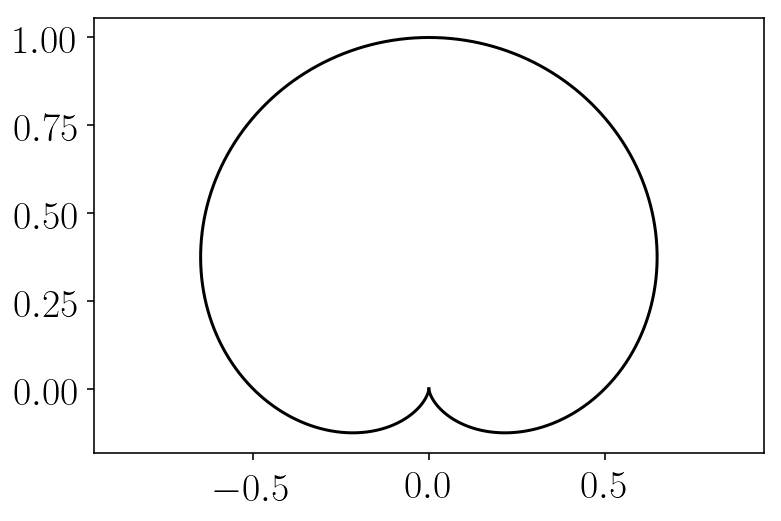

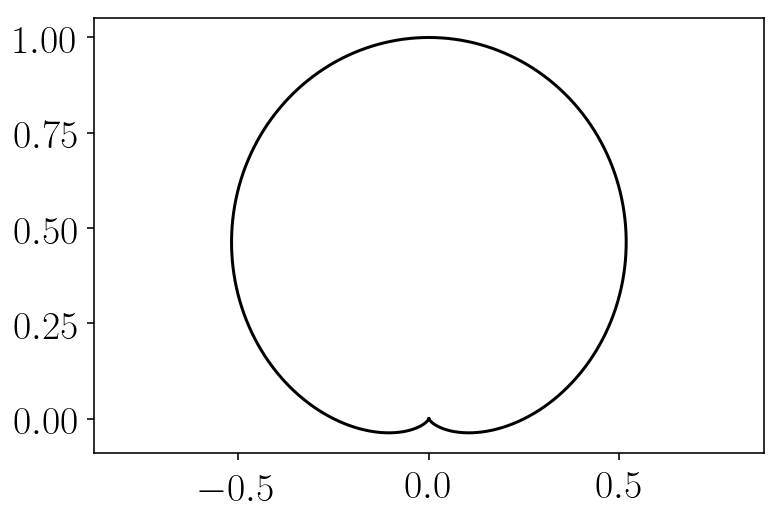

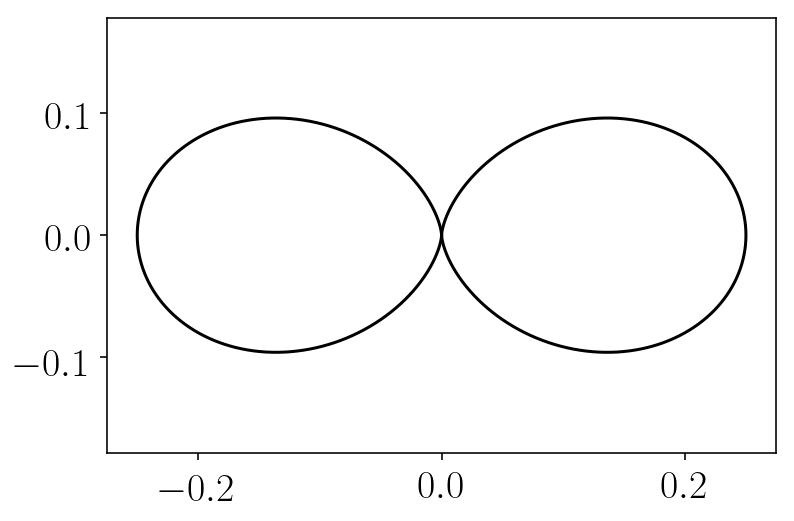

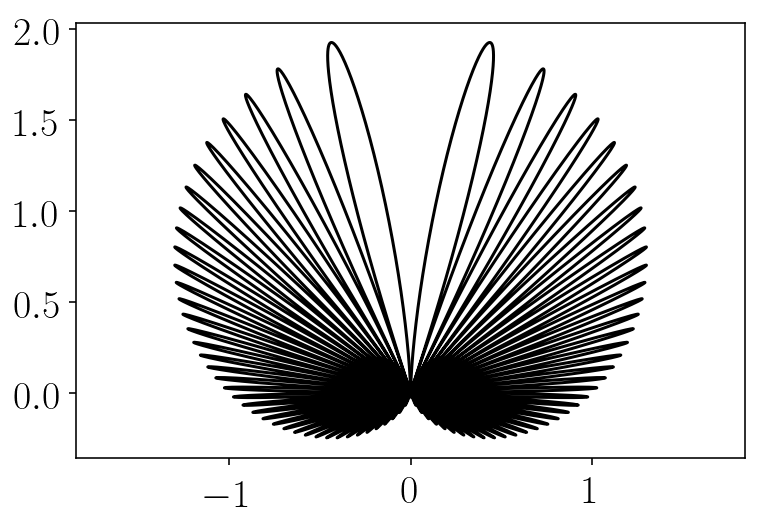

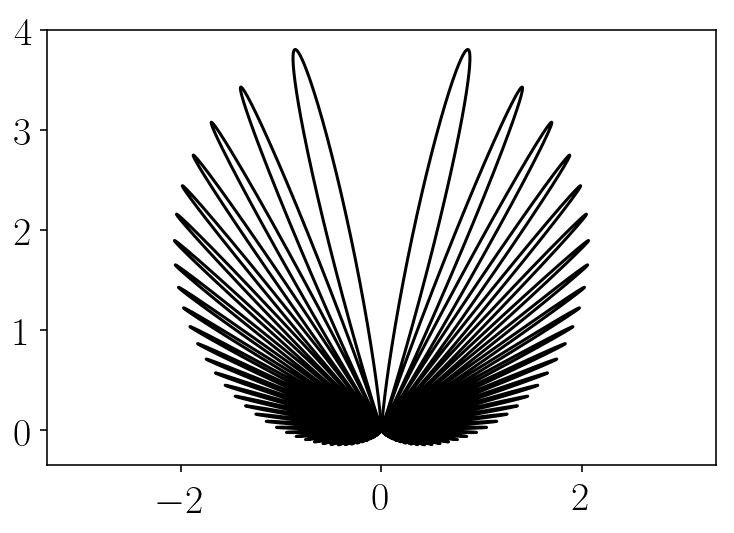

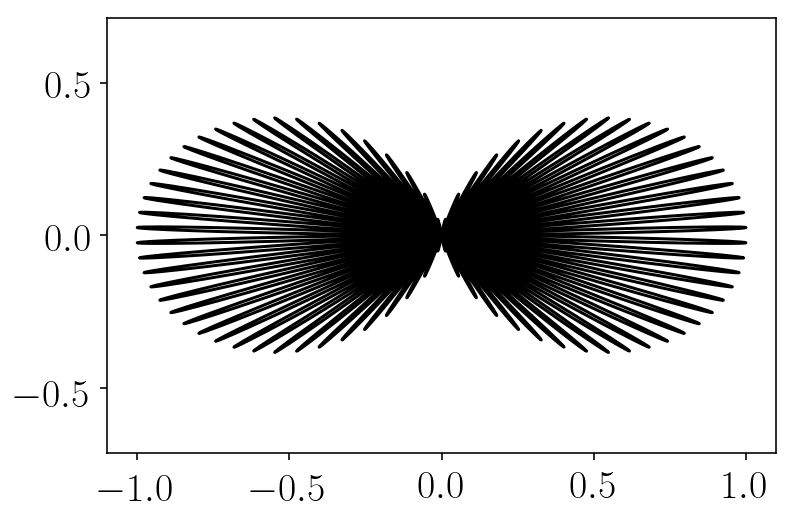

In [14]:
pulsarPeanut('earth')
pulsarPeanut('earth0')
pulsarPeanut('earth180')
pulsarPeanut('full')
pulsarPeanut('full0')
pulsarPeanut('full180')